Customers DataFrame Columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Transactions DataFrame Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


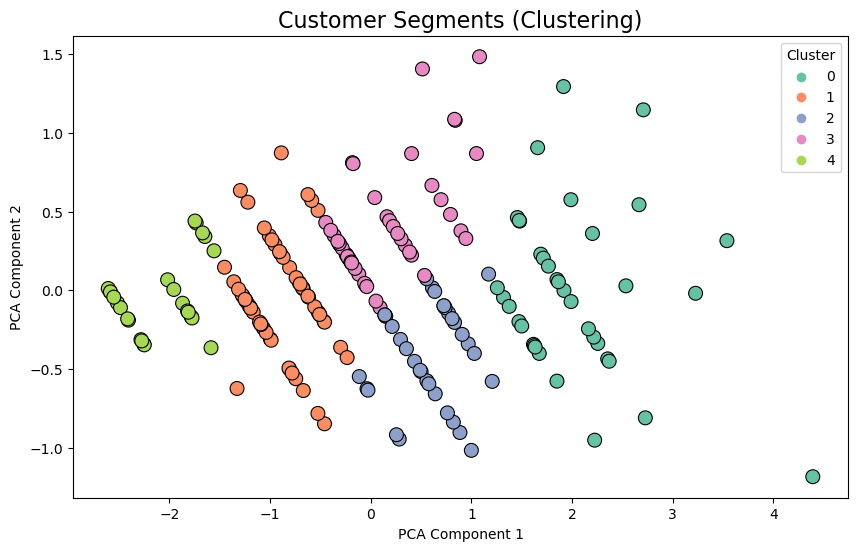

Davies-Bouldin Index: 0.8491558302577694
Silhouette Score: 0.38986113414113127
Calinski-Harabasz Index: 252.46232888800293


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE')
products_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0')
transactions_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF')

# Check the column names in the dataframes
print("Customers DataFrame Columns:", customers_df.columns)
print("Transactions DataFrame Columns:", transactions_df.columns)

# Merge customers and transactions data on 'CustomerID'
merged_df = pd.merge(customers_df, transactions_df, on='CustomerID')

# Feature engineering: total amount spent and frequency of transactions
customer_summary = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Using 'TotalValue' for the total amount spent
    'TransactionID': 'count'  # Using 'TransactionID' for the frequency of transactions
}).reset_index()

# Standardize numerical features
scaler = StandardScaler()
customer_summary_scaled = scaler.fit_transform(customer_summary[['TotalValue', 'TransactionID']])

# Clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters here
customer_summary['cluster'] = kmeans.fit_predict(customer_summary_scaled)

# Calculate clustering metrics
db_index = davies_bouldin_score(customer_summary_scaled, customer_summary['cluster'])
silhouette = silhouette_score(customer_summary_scaled, customer_summary['cluster'])
calinski_harabasz = calinski_harabasz_score(customer_summary_scaled, customer_summary['cluster'])

# PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_summary_scaled)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = customer_summary['cluster']

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='Set2', s=100, edgecolor='black')
plt.title('Customer Segments (Clustering)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.savefig('Rahul_Sharma_Clustering.pdf', format='pdf')
plt.show()

# Output clustering metrics
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

# Report the results
# The number of clusters can be adjusted based on metrics and business requirements.
